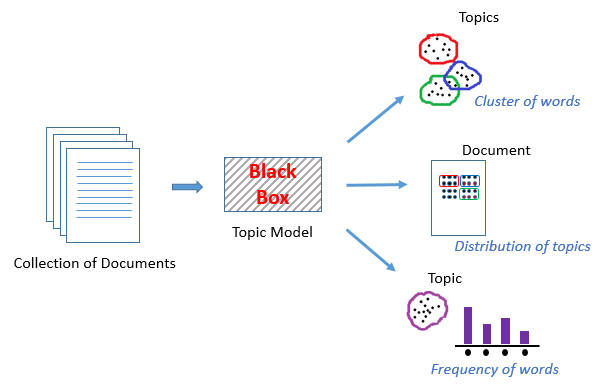

##SVD 


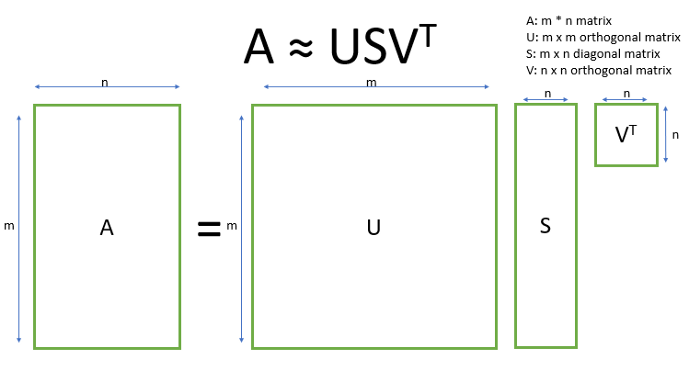

In [9]:
import pandas as pd
import math
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from string import punctuation
import nltk
pi = math.pi

In [13]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


False

In [14]:


inp = ['1.txt','2.txt','3.txt','4.txt','5.txt']


In [15]:
def rem_punct(s):
    str1 = ''
    for char in s:
        if(char not in punctuation):
            str1 = str1 + char
    return str1

def rem_nums(s):
    str1 = ''
    for num in s:
        if(not num.isdigit()):
            str1 = str1 + num
    return str1


In [16]:


docs = len(inp) #no of documents
store =[] 

for i in range(len(inp)):
    file = open(inp[i],'r')
    string = ''
    while 1:
        char = file.read(1)
        if char!='\n':
            string+=char
        if not char:  
            break
    store.append(string)
    file.close



stopwords = nltk.corpus.stopwords.words('english')

all_docs = []
for string in store:
    string = rem_punct(rem_nums(string).lower())
    string = string.split(" ")
    all_docs.append(string)

bow=[]
for j in range(docs):
    temp = []
    for i in all_docs[j]: 
        if i not in stopwords and len(i)>0 and i!=None:
            temp.append(i)
    bow.append(temp)
print(bow)

[['experiment', 'word', 'cloud', 'zipfs', 'law', 'mapreduce', 'week', 'pick', 'english', 'classic', 'project', 'gutenberg', 'download', 'text', 'file', 'find', 'basic', 'statistics', 'related', 'word', 'occurrence', 'file', 'plot', 'histogram', 'first', 'fifty', 'frequently', 'appearing', 'wordsfun', 'part', 'perform', 'tokenization', 'remove', 'words', 'stoplist', 'perform', 'stemminglemmatization', 'create', 'word', 'cloud', 'based', 'relative', 'frequency', 'occurrence', 'leftover', 'text', 'validate', 'zipfs', 'law', 'using', 'method', 'least', 'squares', 'find', 'slope', 'intercept', 'exponent', 'alpha', 'corpus', 'constant', 'cchallenge', 'problemsc\tselect', 'dataset', 'digital', 'artifacts', 'considering', 'interest', 'image', 'video', 'multimedia', 'sound', 'etc', 'describe', 'detail', 'lexical', 'roots', 'would', 'use', 'indexing', 'artifacts', 'possible', 'develop', 'analogy', 'indexing', 'text', 'terms', 'lexical', 'rootsc\tdownload', 'large', 'corpus', 'english', 'text', '

In [17]:

def unique(bow):
    a = bow[0]
    for i in range(1,len(bow)):
        a = set(a).union(set(bow[i]))
    print(a)
    return a

wordset = unique(bow)


{'example', 'image', 'k', 'leftover', 'random', 'heatmaps', 'accordance', 'operations', 'models', 'newsgroups', 'basic', 'principle', 'retrievalhow', 'focuses', 'bert', 'visual', 'base', 'science', 'indexquery', 'rootsc\tdownload', 'begin', 'method', 'rocchio', 'small', 'analyze', 'decompositionapply', 'average', 'describe', 'file', 'help', 'harshman', 'project', 'highest', 'bayes', 'natural', 'informationwhat', 'give', 'analogy', 'results', 'recommendations', 'appropriate', 'digital', 'matrix', 'information', 'slope', 'building', 'relationships', 'elasticsearchs', 'dataset', 'idea', 'compare', 'testing', 'fifty', 'textbased', 'draw', 'programming', 'tokenize', 'r', 'corpora', 'problemsc', 'svdcompute', 'index', 'note', 'mappings', 'compared', 'allows', 'open', 'corpus', 'society', 'pick', 'using', 'offer', 'dataobserve', 'judgementsuse', 'matrixfor', 'modeluse', 'indexer', 'singular', 'conclusions', 'consider', 'zipfs', 'vectors', 'build', 'classifierdataset', 'softwarepython', 'tfidf

In [18]:
#returns a document term matrix
def term_document_matrix():
    for bow_i,worddict_i in zip(bow,worddict):
        for word in bow_i:
            worddict_i[word]+=1 
        
    return pd.DataFrame(worddict)


In [19]:

worddict = [dict.fromkeys(wordset,0) for i in range(len(bow))]
docterm = term_document_matrix()
print(docterm)


   example  image  k  leftover  random  heatmaps  accordance  operations  \
0        1      1  0         1       0         0           0           0   
1        1      0  0         0       1         0           0           0   
2        0      0  0         0       0         1           0           1   
3        0      0  0         0       0         0           0           0   
4        0      0  1         0       0         0           1           0   

   models  newsgroups  ...  multidimensional  countvectorizer  discounted  \
0       0           0  ...                 0                0           0   
1       0           0  ...                 0                0           0   
2       3           1  ...                 1                0           1   
3       0           1  ...                 0                0           0   
4       0           1  ...                 0                1           0   

   furnas  intercept  adjustmentsensure  matrixusing  g  zipfâ€™s  jupyter  
0  

In [20]:
def term_freq(worddict,bow):
    tfdict = {} 
    bowcount = len(bow) 
    for word,count in worddict.items(): 
        tfdict[word] = count/float(bowcount)
    return tfdict


In [21]:
tfbow = []
for i,j in zip(worddict,bow):
    tfbow.append(term_freq(i,j))
print(tfbow)

[{'example': 0.008264462809917356, 'image': 0.008264462809917356, 'k': 0.0, 'leftover': 0.008264462809917356, 'random': 0.0, 'heatmaps': 0.0, 'accordance': 0.0, 'operations': 0.0, 'models': 0.0, 'newsgroups': 0.0, 'basic': 0.008264462809917356, 'principle': 0.0, 'retrievalhow': 0.0, 'focuses': 0.0, 'bert': 0.0, 'visual': 0.0, 'base': 0.0, 'science': 0.0, 'indexquery': 0.0, 'rootsc\tdownload': 0.008264462809917356, 'begin': 0.008264462809917356, 'method': 0.008264462809917356, 'rocchio': 0.0, 'small': 0.0, 'analyze': 0.0, 'decompositionapply': 0.0, 'average': 0.0, 'describe': 0.008264462809917356, 'file': 0.01652892561983471, 'help': 0.0, 'harshman': 0.0, 'project': 0.008264462809917356, 'highest': 0.0, 'bayes': 0.0, 'natural': 0.0, 'informationwhat': 0.0, 'give': 0.0, 'analogy': 0.008264462809917356, 'results': 0.0, 'recommendations': 0.0, 'appropriate': 0.0, 'digital': 0.008264462809917356, 'matrix': 0.0, 'information': 0.0, 'slope': 0.008264462809917356, 'building': 0.0, 'relationshi

In [22]:
def idf(doclist):
    idfdict={}
    n = len(doclist)
    idfdict = dict.fromkeys(doclist[0].keys(),0)
    for doc in doclist:
        for word,val in doc.items():
            if val>0:
                idfdict[word]+=1
    for word,val in idfdict.items():
        idfdict[word]=math.log(n/float(val)) 
    return idfdict


In [23]:

idfs = idf(worddict) #storing idf
print(idfs)

{'example': 0.9162907318741551, 'image': 1.6094379124341003, 'k': 1.6094379124341003, 'leftover': 1.6094379124341003, 'random': 1.6094379124341003, 'heatmaps': 1.6094379124341003, 'accordance': 1.6094379124341003, 'operations': 1.6094379124341003, 'models': 1.6094379124341003, 'newsgroups': 0.5108256237659907, 'basic': 1.6094379124341003, 'principle': 1.6094379124341003, 'retrievalhow': 1.6094379124341003, 'focuses': 1.6094379124341003, 'bert': 1.6094379124341003, 'visual': 1.6094379124341003, 'base': 1.6094379124341003, 'science': 1.6094379124341003, 'indexquery': 1.6094379124341003, 'rootsc\tdownload': 1.6094379124341003, 'begin': 1.6094379124341003, 'method': 1.6094379124341003, 'rocchio': 1.6094379124341003, 'small': 1.6094379124341003, 'analyze': 1.6094379124341003, 'decompositionapply': 1.6094379124341003, 'average': 1.6094379124341003, 'describe': 0.9162907318741551, 'file': 1.6094379124341003, 'help': 1.6094379124341003, 'harshman': 1.6094379124341003, 'project': 1.609437912434

In [24]:
def tfidf(tfbow_dict,idfs):
    tfidf = {}
    for word,val in tfbow_dict.items():
        tfidf[word]=val*idfs[word] #term freq multiply idf  
    return tfidf


In [25]:

tfidfl = [] 
for i in tfbow:
    tfidfl.append(tfidf(i,idfs))  
print(tfidfl)

[{'example': 0.0075726506766459105, 'image': 0.013301139772182648, 'k': 0.0, 'leftover': 0.013301139772182648, 'random': 0.0, 'heatmaps': 0.0, 'accordance': 0.0, 'operations': 0.0, 'models': 0.0, 'newsgroups': 0.0, 'basic': 0.013301139772182648, 'principle': 0.0, 'retrievalhow': 0.0, 'focuses': 0.0, 'bert': 0.0, 'visual': 0.0, 'base': 0.0, 'science': 0.0, 'indexquery': 0.0, 'rootsc\tdownload': 0.013301139772182648, 'begin': 0.013301139772182648, 'method': 0.013301139772182648, 'rocchio': 0.0, 'small': 0.0, 'analyze': 0.0, 'decompositionapply': 0.0, 'average': 0.0, 'describe': 0.0075726506766459105, 'file': 0.026602279544365295, 'help': 0.0, 'harshman': 0.0, 'project': 0.013301139772182648, 'highest': 0.0, 'bayes': 0.0, 'natural': 0.0, 'informationwhat': 0.0, 'give': 0.0, 'analogy': 0.013301139772182648, 'results': 0.0, 'recommendations': 0.0, 'appropriate': 0.0, 'digital': 0.013301139772182648, 'matrix': 0.0, 'information': 0.0, 'slope': 0.013301139772182648, 'building': 0.0, 'relation

In [26]:

def transpose(A):
    ans = np.zeros((len(A[0]),len(A)))
    for i in range(len(A)):
        for j in range(len(A[0])):
            ans[j][i] = A[i][j]
    return ans


In [27]:
def matmul(A,X):
    
    if(type(X)!=list and len(X.shape)==1):
        X = X.reshape((len(X), 1))
    ans = np.zeros((len(A),len(X[0])))
    for i in range(len(A)):
        for j in range(len(X[0])):
            for k in range(len(X)):
                ans[i][j] = ans[i][j] + A[i][k]*X[k][j]
    if(type(X)!=list and ans.shape[1]==1):
        ans = ans.reshape((len(ans)))
    return ans


In [28]:
   
def SvD(Amatrix):
  u, s, v=np.linalg.svd(Amatrix)
  return u,s,v


In [29]:
X = pd.DataFrame(tfidfl).T
l_2d = X.T.values.tolist()
l_2d = np.array(l_2d)
l_2d = transpose(l_2d)
L,S,R=SvD(l_2d)

In [30]:
print(L.shape,S.shape,R.shape)

(437, 437) (5,) (5, 5)


In [31]:
S

array([0.28632433, 0.17285466, 0.15494898, 0.13675645, 0.1246871 ])

In [32]:

def zero_padding(n,U,S,V):
    t = []
    for i in range(0,n):
        t.append(S[i])
    #t is the tuple consisting of first n characters of the tuple S (S is sigma)
    for i in range(len(S)-n):
        t.append(0) #zero_padding t with zeros
    
    #convert the non-selected singular values to 0 and form a diagonal matrix, store as A
    A=[]
    for i in range (0,len(S)):
        temp = []
        for j in range(0,len(S)):
            if(j == i):
                temp.append(float(t[j]))
            else:
                temp.append(float(0))
        A.append(temp)
    newrow = []
    for i in range(0,len(S)):
        newrow.append(0)
    #newrow is a list of zeros having same length as S
    for i in range(len(U)-len(S)): 
        A.append(newrow)
        
    return A

def reconstruct(u,s,v,n):
    A=zero_padding(n,u,s,v)
    return np.round(matmul(matmul(u,A),v),decimals=3)
    
def frobenius(a,a2): #finds how similar two matrices are
    
    tempi1=(a-a2)**2
    tempi2=a**2
    sum1,sum2=0,0
    
    for i in (tempi1):
        for j in (i):
            sum1+=j
    for i in (tempi2):
        for j in (i):
            sum2+=j
    ret = math.sqrt(sum1)/math.sqrt(sum2)
    return ret 

def find_k():
    for i in range(1,len(S)):
        f=frobenius(l_2d,reconstruct(L,S,R,i))
        if f<0.35 :
          print(i)
          return i


def search(q):
    q=rem_punct(q)
    q=q.lower().split(" ")
    terms = X.index
    
    query=[]
    for i in terms:
        if(i in q):
            query.append(1)
        else:
            query.append(0) 
    query=np.asarray(query)
    if 1 not in query:
        print("Could not find any documents")
    
    else:
        k = 2
        print("k",k)
        print("q",query)
        reconstructed_A = reconstruct(L,S,R,k) 
        print(reconstructed_A)

        score = query.dot(reconstructed_A)
        
        sort = {}
        for i in range(len(score)):
            if(score[i]<0):
                score[i]=0
            sort[i+1] = score[i]
        last = {}
        for w in sorted(sort, key=sort.get, reverse=True):
            last[w]=sort[w]
        xAxis=[]
        title="Document-wise weightage of the string: "
        for i in q: 
            title=title+" "+i
        yAxis=[]
        
        for document,sc in last.items():
            print("Document: ",document)
            xAxis.append(document)
            yAxis.append(sc)
        
        plt.bar(xAxis, yAxis, color ='red',  
                width = 0.4) 
        
        plt.xlabel("Document number") 
        plt.ylabel("Relevance-Score") 
        plt.title(title) 
        plt.show() 



Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit
Enter Document number:


Experiment 0:  Word Cloud, Zipfs law, Map-Reduce (Week-1)0.1 Pick an English classic from Project Gutenberg.  Download the same as a text file. Find basic statistics related to the word occurrence in the file.  Plot a histogram of first fifty most frequently appearing words.(Fun part: Perform tokenization, remove the words in stoplist, perform stemming/lemmatization. Create a word cloud based on the relative frequency of occurrence of leftover text.)0.2 Validate the Zipfs law.  Using the method of least squares find the slope and intercept (Exponent alpha and the corpus constant C).Challenge Problems:C0.1	Select a dataset of digital artifacts considering your interest (image, video, multimedia, sound, etc.). Describe in detail the lexical roots that you would use for indexing the artifacts. If possible develop an analogy with indexing text with terms as lexical roots.C0.2	Download a large c

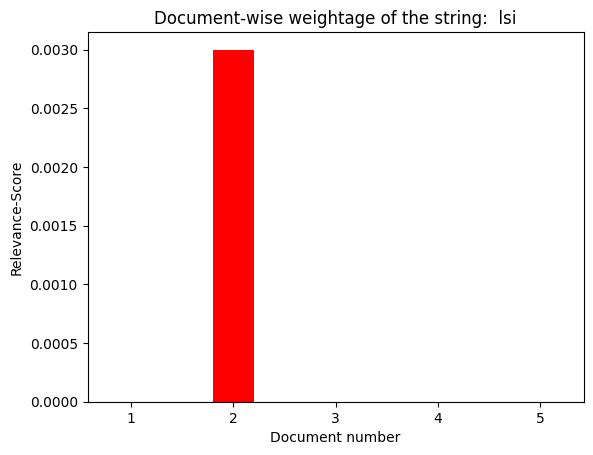



Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit
Enter keyword you want to search

Loading your search results...
k 2
q [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

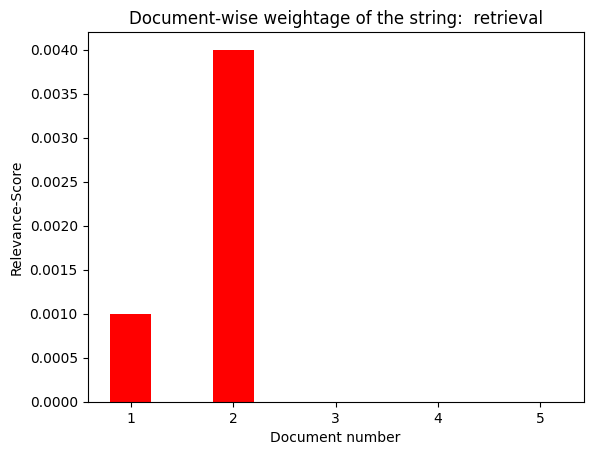



Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit
Enter keyword you want to search

Loading your search results...
k 2
q [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

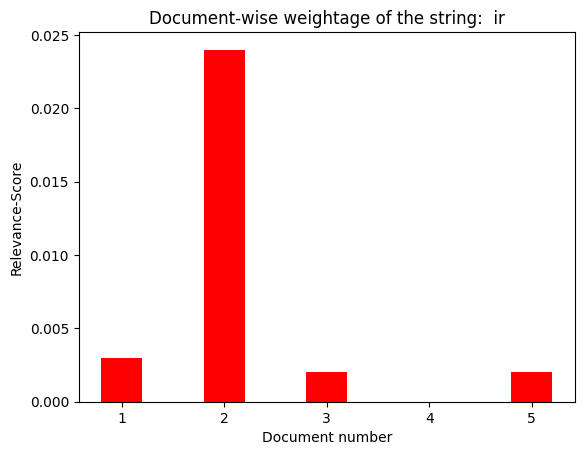



Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit
THANK YOU
Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit


ValueError: invalid literal for int() with base 10: ''

: 

In [33]:
while(1):
    print("Please choose an option:\n"
    + "1: Search keywords \n"
    + "2: View Documents \n"
    + "3: Exit")
    opt = int(input())
    if(opt == 1):
        print("Enter keyword you want to search\n")
        s = input()
        print("Loading your search results...")
        search(s)
        print("\n")
    elif (opt == 2):
        print("Enter Document number:\n\n")
        doc_n = int(input())

        if(doc_n>len(store)):
            print("There are only ",len(store)," documents")
            continue
        print(store[doc_n - 1])
        print("\n")
    elif( opt == 3):
        print("THANK YOU")
        exit()
    else:
        print("Enter valid input. ")